In [2]:
import pandas as pd


Abrir dataset con las noticias a trabajar

In [3]:
npr = pd.read_csv("C:\\Users\\fabia\\Desktop\\PLN\\NewsF.csv", sep=';')

In [4]:
npr.head()

,Unnamed: 0,Type,News
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...


# Aplicacion latenete de Thursay (LDA)

Preprocesamiento

In [5]:
#Vectorizacion

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cv = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')
#max_df: Elimina los terminos que se repiten en gran parte de los documentos y se indica la probabilidad de frecuencia de los terminos a eliminar
#min_df: Elimina los terminos que aparecen con muy poca frecuencia en los documentos y se indica la frecuenci minima con un numero de apariciones
#stop_words: Elimina las palabras innecesarias como los conectores, espacios, etc. Se indica el idioma.

In [8]:
#Creacion de matris con las modificaciones o transformaciones correspondientes

In [9]:
dtm = cv.fit_transform(npr['News'])

In [10]:
dtm

<2225x17473 sparse matrix of type '<class 'numpy.int64'>'
	with 310493 stored elements in Compressed Sparse Row format>

Realizar latente

In [11]:
from sklearn.decomposition import LatentDirichletAllocation

In [12]:
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
#n_components: Numero de temas en el documento
#random_state: 

Ajustar LDA respecto a la matriz de giro de documentos

In [13]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

Captr el vocabulario de palabras

In [14]:
len(cv.get_feature_names())

17473

In [15]:
#Lista de palabras de todos los documentos
type(cv.get_feature_names())

list

In [16]:
#Seleccionar palabras
cv.get_feature_names()[10000]

'mathieu'

In [17]:
#Seleccion de palabras aleatorias
import random
random_word_id = random.randint(0,17473)
cv.get_feature_names()[random_word_id]

'fiorina'

Captar los temas

In [18]:
len(LDA.components_)

5

In [19]:
#Matriz de py que contiene probabilidades para cada palabra
type(LDA.components_)

numpy.ndarray

In [20]:
#Forma de la matriz
LDA.components_.shape

(5, 17473)

In [21]:
#Vista de componentes
LDA.components_

array([[2.26622616e+00, 3.45874966e+01, 4.11999271e+01, ...,
        7.60895727e+00, 2.00828990e-01, 2.19989596e+00],
       [2.02700090e+00, 2.76161223e+02, 2.00016493e-01, ...,
        2.01501593e-01, 2.00000069e-01, 2.00000240e-01],
       [2.00000712e-01, 1.72652911e+01, 2.00000364e-01, ...,
        2.34155988e+00, 4.19917067e+00, 2.00000479e-01],
       [2.00679049e-01, 1.50195674e+02, 2.00005970e-01, ...,
        2.00611652e-01, 2.00000155e-01, 2.00103024e-01],
       [2.30609318e+00, 3.26790316e+02, 2.00050024e-01, ...,
        4.64736960e+00, 2.00000113e-01, 2.00000294e-01]])

Diagnosticar el rendimiento del modelo con perplejidad y probabilidad de registro

In [22]:
LDA.score(dtm)

-3669456.25617339

In [23]:
LDA.perplexity(dtm)

4069.6829388229417

In [24]:
LDA.get_params()

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 5,
 'n_jobs': None,
 'n_topics': None,
 'perp_tol': 0.1,
 'random_state': 42,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

GridSearch

In [29]:
#DEFINIENDO LOS PARAMETROS DE BUSQUEDA
search_params = {'n_components':[5,10,15],'learning_decay':[.5,.7,.9],'n_jobs':[-1]}

In [30]:
#INICIANDO EL MODELO
ldaa= LatentDirichletAllocation()

In [31]:
from sklearn.model_selection import GridSearchCV
#INICIANDO LA CLASE GRID SEARCH
model = GridSearchCV(ldaa,param_grid=search_params)

In [32]:
#HACER UNA BUSQUEDA DE CUADRIC
model.fit(dtm)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [5, 10, 15], 'learning_decay': [0.5, 0.7, 0.9], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
#Mejor modelo
best_lda_model=model.best_estimator_

In [34]:
#Paramtros modelo
print("Best Model's Params: ",model.best_params_)

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 5, 'n_jobs': -1}


In [35]:
#REgistro ed puntaje de probabilidad
print("Mejor puntaje de probabilidad: ",model.best_score_)

Mejor puntaje de probabilidad:  -1425321.7161894084


In [36]:
#Perplejidad
print("Modelo prerplejidad: ", best_lda_model.perplexity(dtm))

Modelo prerplejidad:  3910.268575329605


In [37]:
#for gscore in model.cv_results_:
#    print(gscore)
lista=[]
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
for gscore,params in zip(gscore,params): 
    if params==0.5:
        lista.append(gscore)
        
print(lista)

[-1426834.6039571923, -1504948.933489343, -1576466.805601462]


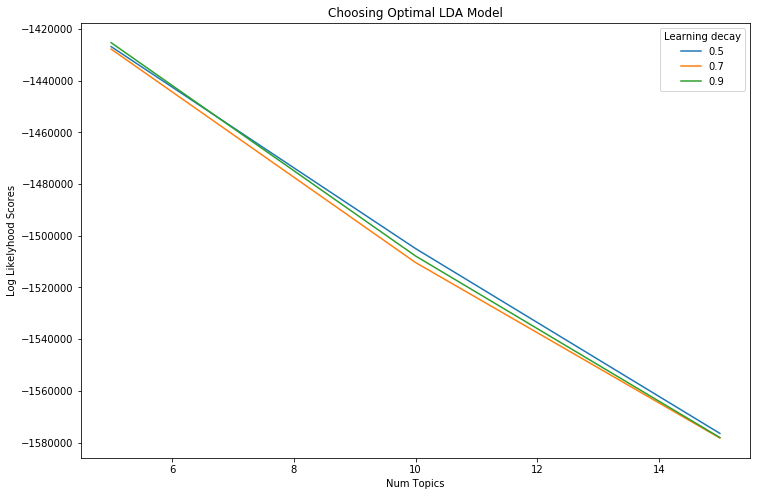

In [40]:
import matplotlib.pyplot as plt
# Obtenga probabilidades de registro de la salida de búsqueda de cuadrícula
n_topics=[5,10,15]
#model.cv_results_['mean_test_score'],model.cv_results_['param_learning_decay']
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
Log_likelyoods_5=[]
Log_likelyoods_7=[]
Log_likelyoods_9=[]
for gscore,params in zip(gscore,params):
    if params==0.5:
        Log_likelyoods_5.append(round(gscore))
    if params==0.7:
        Log_likelyoods_7.append(round(gscore))
    if params==0.9:
        Log_likelyoods_9.append(round(gscore))

#Log_likelyoods_5 = [round (mean) for mean,param in zip(means,params) if params==0.5]
#Log_likelyoods_7 = [round (mean) for mean,param in zip(means,params) if params==0.7]
#Log_likelyoods_9 = [round (mean) for mean,param in zip(means,params) if params==0.9]
#Log_likelyoods_5 = [for gscore,param in zip(gscore,params): if params==0.5: round(gscore)]
#Log_likelyoods_7 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.7]
#Log_likelyoods_9 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, Log_likelyoods_5, label='0.5')
plt.plot(n_topics, Log_likelyoods_7, label='0.7')
plt.plot(n_topics, Log_likelyoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()


In [41]:
##Tema dominante por documento

In [42]:
#Crear documentos- Matriz de temas
lda_output = best_lda_model.transform(dtm)

In [43]:
best_lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.9,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [44]:
#Nombre de columnas
topicnames = []
for i in range(int(best_lda_model.n_components)):
    name='Topic'+str(i)
    topicnames.append(name)

In [45]:
#nombre de indices
docnames = []
#for i in range(len(cv.get_feature_names())):
for i in range(2225):
    docnames.append('Doc'+str(i))

In [48]:
import numpy as np
#Creando un dataframe en pandas
df_document_topic=pd.DataFrame(np.round(lda_output,2),columns=topicnames,index=docnames)

In [49]:
# Obtener tema dominante para cada documento
dominant_topic=np.argmax(df_document_topic.values,axis=1)
df_document_topic['dominant_topic']=dominant_topic

In [50]:
#Estilando
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

In [51]:
#Aplicando estilo
df_document_topic=df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0,0,0,0.9,0.09,3
Doc1,0,0.69,0,0.31,0,1
Doc2,0,0.14,0,0.29,0.57,4
Doc3,0.03,0.02,0,0.95,0,3
Doc4,0.28,0,0,0.71,0,3
Doc5,0,0.51,0,0.44,0.05,1
Doc6,0,0.48,0,0.51,0,3
Doc7,0,0.76,0,0.23,0,1
Doc8,0,0.38,0,0.62,0,3
Doc9,0,0.32,0,0.23,0.45,4


In [52]:
#Distribucion de temas entre documentos

In [53]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

TypeError: 'Styler' object is not subscriptable

In [54]:
#Visualizacion pyLDAVIS
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pyLDAvis'

In [87]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = cv.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

,00,000,000m,000th,007,01,0100,011,0130,02,...,zola,zombie,zombies,zone,zones,zoom,zooms,zurich,zvonareva,zvyagintsev
Topic0,0.285951,19.931993,0.305484,0.200116,0.202285,0.207768,0.201347,0.200000,0.200010,0.252381,...,3.134788,5.120490,0.212882,6.865694,0.206722,0.200000,0.366897,9.130289,0.223056,0.200000
Topic1,1.878621,232.869193,6.681289,0.200000,0.200000,3.292713,0.200000,0.374142,0.200000,2.145200,...,0.200001,0.202592,0.200000,9.227519,0.204367,0.200065,0.200001,0.201850,0.200000,0.200000
Topic2,0.203906,80.864149,0.201781,0.205082,0.234274,0.201549,2.197704,0.200000,2.199758,0.200001,...,0.229500,1.200036,0.200028,1.164489,0.200281,0.200000,0.200001,0.203852,0.200686,2.199999
Topic3,4.426732,337.762933,34.611444,5.194504,5.160990,4.096250,0.200152,2.025856,0.200152,0.202417,...,0.235710,0.214165,1.663134,2.377541,5.178821,0.200000,0.213024,5.081972,0.200001,0.200000
Topic4,0.204790,133.571732,0.200001,0.200297,0.202451,0.201720,0.200796,0.200000,0.200080,0.200001,...,0.200001,0.262717,6.723956,1.364758,0.209809,3.199935,2.020078,0.382037,4.176257,0.200000


In [88]:
# Show top n keywords for each topic
def show_topics(cv=cv, lda_model=lda_model, n_words=20):
    keywords = np.array(cv.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(cv=cv, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,said,game,time,england,win,year,world,play,players,club,just,team,half,second,wales
Topic 1,said,mr,government,labour,people,election,party,blair,minister,new,tax,brown,told,public,uk
Topic 2,said,film,best,mr,year,music,awards,won,award,years,new,star,bbc,director,british
Topic 3,said,year,new,market,sales,company,2004,uk,firm,000,shares,oil,number,prices,china
Topic 4,said,people,mobile,technology,music,mr,use,users,digital,new,software,net,phone,games,like


In [55]:
#Trabajando con un tema
single_topic = LDA.components_[0]

In [56]:
#Ordenar los indices de la matriz de la mas baja a la mas alta
single_topic.argsort()

array([13214,  5925,  1602, ..., 13725,  2177,  6422], dtype=int64)

In [57]:
import numpy as np
#Ejemplo
arr = np.array([10,200,3])
arr.argsort()

array([2, 0, 1], dtype=int64)

In [58]:
#10 palabras mas frecuentes en el tema 1
single_topic.argsort()[-10:]

array([ 5758, 17251, 15909, 10773, 17292,  6920, 17387, 13725,  2177,
        6422], dtype=int64)

In [59]:
top_ten_words = single_topic.argsort()[-10:]

In [60]:
for index in top_ten_words:
    print(cv.get_feature_names()[index])

england
won
time
new
world
game
year
said
best
film


In [61]:
#Captar las palabras de mayor probabilidad por tema

In [62]:
for index,topic in enumerate(LDA.components_):
    print(f'Las principales 15 palabras del tema #(index)')
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

Las principales 15 palabras del tema #(index)
['win', 'just', 'awards', 'years', 'games', 'england', 'won', 'time', 'new', 'world', 'game', 'year', 'said', 'best', 'film']




Las principales 15 palabras del tema #(index)
['brown', 'told', 'minister', 'music', 'mobile', 'uk', 'blair', 'party', 'election', 'new', 'labour', 'government', 'people', 'mr', 'said']




Las principales 15 palabras del tema #(index)
['good', 'cup', 'players', 'year', 'league', 'open', 'play', 'match', 'chelsea', 'united', 'time', 'win', 'game', 'club', 'said']




Las principales 15 palabras del tema #(index)
['microsoft', 'information', 'computer', 'search', 'use', 'security', 'china', 'world', 'new', 'net', 'users', 'mr', 'software', 'people', 'said']




Las principales 15 palabras del tema #(index)
['years', 'economic', '000', 'uk', 'firm', 'mr', 'economy', '2004', 'growth', 'market', 'new', 'sales', 'company', 'year', 'said']






In [63]:
#Documento original convertido en matriz
dtm

<2225x17473 sparse matrix of type '<class 'numpy.int64'>'
	with 310493 stored elements in Compressed Sparse Row format>

In [64]:
#Datos
npr.head()

,Unnamed: 0,Type,News
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...


In [65]:
#Agregar analisis a conjunto de datos con el titulo e cada tema

In [66]:
#Crear lista con temas reales de la matriz dtm
topic_result = LDA.transform(dtm)

In [67]:
#Matrizcon los temas
topic_result.shape

(2225, 5)

In [68]:
#provavilidades de pertenecer a un tema en particular redondeado
topic_result[0].round(2)

array([0.04, 0.  , 0.  , 0.18, 0.78])

In [69]:
#Tema al que pertenece cada articulo
topic_result[0].argmax()

4

In [70]:
npr['Tema_LDA'] = topic_result.argmax(axis=1)

In [71]:
npr.head()

,Unnamed: 0,Type,News,Tema_LDA
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...,4
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...,4
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...,3
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...,4
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...,4


# SOM 2

In [72]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sompy.sompy import SOMFactory
from sklearn.datasets import fetch_california_housing

In [73]:
data = fetch_california_housing()
descr = data.DESCR
names = fetch_california_housing().feature_names+["HouseValue"]

data = np.column_stack([data.data, data.target])
print(descr)
print( "FEATURES: ", ", ".join(names))

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [74]:
data

array([[   8.3252    ,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   7.2574    ,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   1.8672    ,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

In [75]:
topic_result

array([[4.28742950e-02, 8.77403585e-04, 8.66898790e-04, 1.79950296e-01,
        7.75431107e-01],
       [1.01653153e-03, 1.01805057e-03, 1.00879532e-03, 3.32824709e-01,
        6.64131914e-01],
       [1.01007744e-02, 1.32976869e-03, 1.32541489e-03, 9.21209754e-01,
        6.60342883e-02],
       ...,
       [4.33759552e-04, 2.61964670e-01, 4.33784356e-04, 7.36734446e-01,
        4.33340178e-04],
       [1.05941996e-03, 1.06768389e-03, 1.06207233e-03, 9.95748587e-01,
        1.06223663e-03],
       [6.02622424e-01, 3.54209525e-01, 1.67465868e-04, 4.28334814e-02,
        1.67103597e-04]])

In [76]:
topic_result.shape

(2225, 5)

# Visualizacion

In [77]:
name=['Tech','Economy','Sport','Entertainment','Business']

In [78]:
name

['Tech', 'Economy', 'Sport', 'Entertainment', 'Business']

In [79]:
#msz = calculate_msz(data)
sm = SOMFactory().build(topic_result, normalization = 'var', initialization='random', component_names=name)
sm.train(n_job=1, verbose=False, train_rough_len=2, train_finetune_len=5)

In [80]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.4750561797752809; Quantization error = 0.19970313005500695


Components mmap

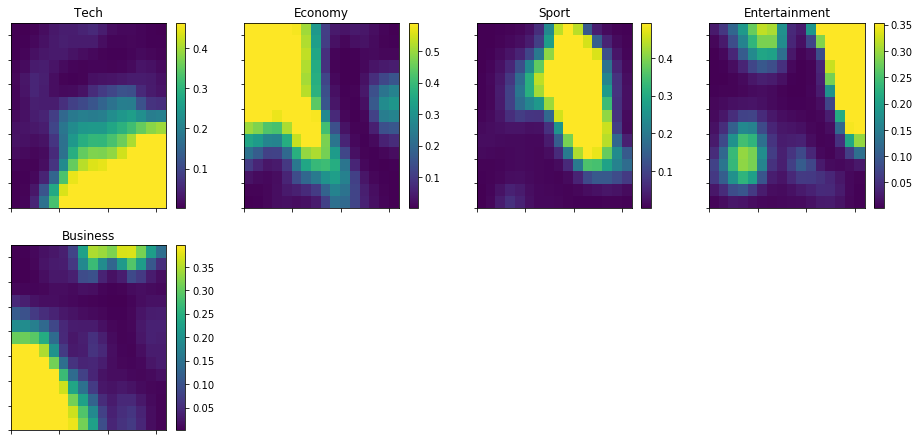

In [81]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

Hist map

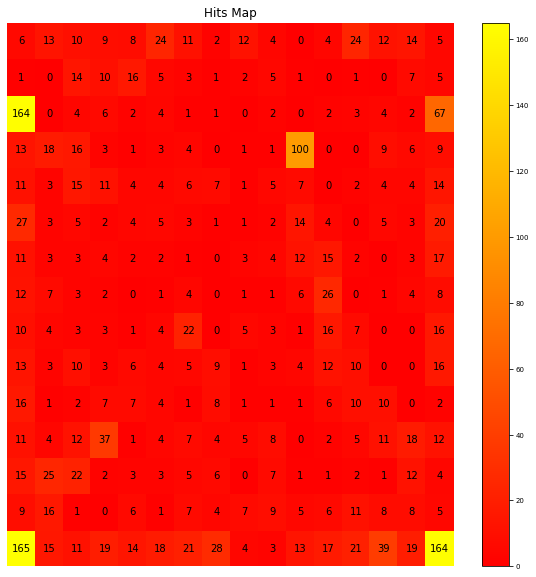

In [82]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)
plt.show()
#cmap="Greys"

K-Means clustering

C:\ProgramData\Anaconda3\lib\site-packages\sompy\visualization\hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


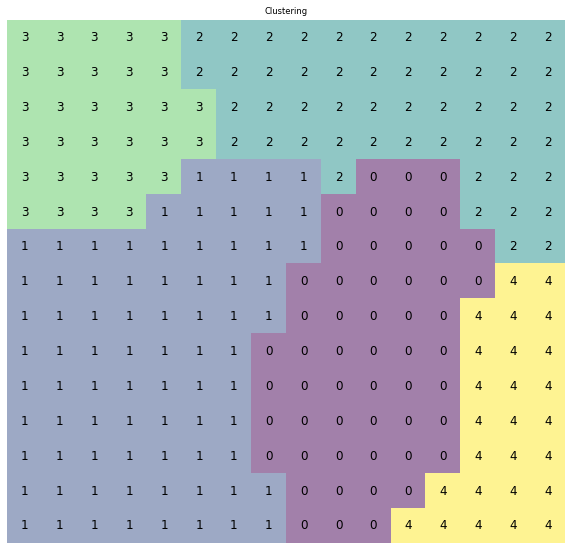

In [83]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(5)
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)

Perplejidad

In [84]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from nltk.lm import Vocabulary

In [85]:
lda_model = LatentDirichletAllocation(n_topics=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )